# Extraction of regulatory elements

In [26]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pybedtools
from pyfaidx import Fasta
from Bio import SeqIO
from Bio.SeqUtils import GC
mpl.rcParams['figure.dpi']= 100

In [67]:
mm_fasta = pybedtools.BedTool('data/GRCm38.p6.genome.fa')
iap_bed = pybedtools.BedTool('data/clean.mm10.IAP.mended.extent.bed')
enhc_bed = pybedtools.BedTool('data/clean.enhancers.bed')
cpg_bed = pybedtools.BedTool('data/clean.cpg.bed')

In [68]:
enhc_df = enhc_bed.to_dataframe()
enhc_df

,chrom,start,end,name
0,chr1,4426300,4428300,e1
1,chr1,4543300,4545300,e2
2,chr1,4653200,4655200,e3
3,chr1,4917200,4919200,e4
4,chr1,5023200,5025200,e5
...,...,...,...,...
37468,chr9,66177000,66187800,e36363
37469,chr9,107503400,107514600,e37012
37470,chr9,70918800,70930600,e36539
37471,chr9,70829000,70843800,e36526


In [69]:
# Extracting distances from enhancers
enhc_dist_bed = iap_bed.sort().closest(enhc_bed.sort(), D="b", t="first")

# Converting to dataframe
names = ["chrom", "start", "end", "element_id", "length",
         "strand", "elmt_chrom", "elmt_start", "elmt_end", "elmt_name",
         "enhc_distance"]
enhc_dist_df = enhc_dist_bed.to_dataframe(names=names)
enhc_dist_df

,chrom,start,end,element_id,length,strand,elmt_chrom,elmt_start,elmt_end,elmt_name,enhc_distance
0,chr1,3031358,3031710,28,353,-,chr1,4426300,4428300,e1,1394591
1,chr1,3143092,3148151,182,5060,-,chr1,4426300,4428300,e1,1278150
2,chr1,3997836,3998160,1272,325,-,chr1,4426300,4428300,e1,428141
3,chr1,4132179,4132516,1427,338,-,chr1,4426300,4428300,e1,293785
4,chr1,4556987,4559597,1976,2611,-,chr1,4543300,4545300,e2,-11688
...,...,...,...,...,...,...,...,...,...,...,...
8054,chr9,123742716,123749810,4245666,7095,-,chr9,123700600,123703200,e37461,-39517
8055,chr9,123783363,123788707,4245722,5345,+,chr9,123700600,123703200,e37461,-80164
8056,chr9,124080169,124082990,4246111,2822,+,chr9,124059500,124063300,e37470,-16870
8057,chr9,124376688,124378655,4246418,1968,-,chr9,124137100,124139100,e37473,-237589


In [70]:
# Extracting distances from cpgs
cpg_dist_bed = iap_bed.sort().closest(cpg_bed.sort(), D="b", t="first")

# Converting to dataframe:
names = ["chrom", "start", "end", "element_id", "length",
         "strand", "elmt_chrom", "elmt_start", "elmt_end", "elmt_name",
         "cpg_distance"]
cpg_dist_df = cpg_dist_bed.to_dataframe(names=names)
cpg_dist_df

,chrom,start,end,element_id,length,strand,elmt_chrom,elmt_start,elmt_end,elmt_name,cpg_distance
0,chr1,3031358,3031710,28,353,-,chr1,3531624,3531843,CpG:_27,499915
1,chr1,3143092,3148151,182,5060,-,chr1,3531624,3531843,CpG:_27,383474
2,chr1,3997836,3998160,1272,325,-,chr1,3671654,3672156,CpG:_45,-325681
3,chr1,4132179,4132516,1427,338,-,chr1,4491701,4493673,CpG:_165,359186
4,chr1,4556987,4559597,1976,2611,-,chr1,4571641,4572075,CpG:_44,12045
...,...,...,...,...,...,...,...,...,...,...,...
8054,chr9,123742716,123749810,4245666,7095,-,chr9,123717377,123717806,CpG:_37,-24911
8055,chr9,123783363,123788707,4245722,5345,+,chr9,123851491,123852159,CpG:_59,62785
8056,chr9,124080169,124082990,4246111,2822,+,chr9,123924689,123925609,CpG:_75,-154561
8057,chr9,124376688,124378655,4246418,1968,-,chr9,124422552,124422772,CpG:_22,43898


In [71]:
# Data analysis
len_bins = [0, 700, 50000]
cpg_dist_df["status"] = pd.cut(cpg_dist_df["length"], len_bins, labels=["solo", "int"])
enhc_dist_df["status"] = pd.cut(enhc_dist_df["length"], len_bins, labels=["solo", "int"])

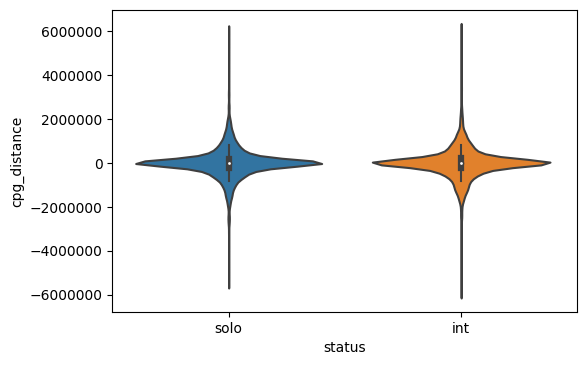

In [72]:
sns.violinplot(x="status", y="cpg_distance", data=cpg_dist_df)

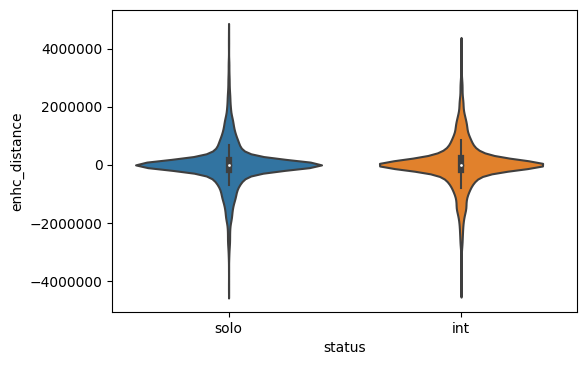

In [73]:
sns.violinplot(x="status", y="enhc_distance", data=enhc_dist_df)

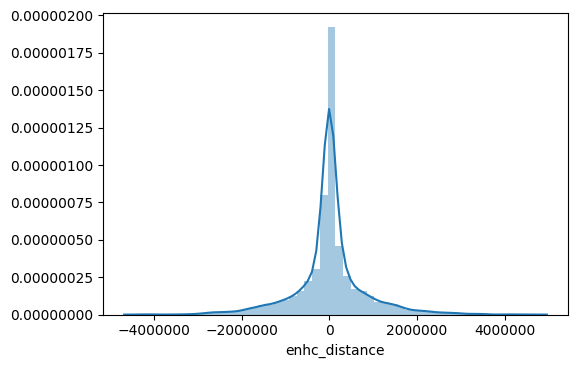

In [76]:
sns.distplot(enhc_dist_df["enhc_distance"])

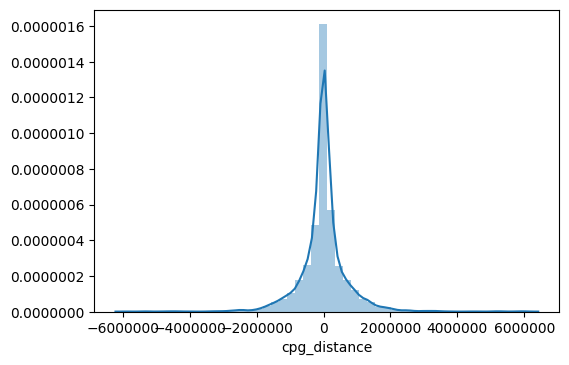

In [77]:
sns.distplot(cpg_dist_df["cpg_distance"])